<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 8 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 27 October 2022</div>

# The English Premier League
<br />
<center>
<img src="ipynb.images/man-city.jpg" width=1000 />
</center>

We study the statistics of the English Premier Leaague.

These are our distributions:

```
Data displays several attributes:

    Div = League Division
    Date = Match Date (dd/mm/yy)
    HomeTeam = Home Team
    AwayTeam = Away Team
    FTHG = Full Time Home Team Goals
    FTAG = Full Time Away Team Goals
    FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
    HTHG = Half Time Home Team Goals
    HTAG = Half Time Away Team Goals
    HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)

    HS = Home Team Shots
    AS = Away Team Shots
    HST = Home Team Shots on Target
    AST = Away Team Shots on Target
    HC = Home Team Corners
    AC = Away Team Corners
    HF = Home Team Fouls Committed
    AF = Away Team Fouls Committed
    HY = Home Team Yellow Cards
    AY = Away Team Yellow Cards
    HR = Home Team Red Cards
    AR = Away Team Red Cards
```

In [28]:
import pandas as pd
import numpy as np
np.random.seed(0)

def determine_winner(fthg, ftag):
    if fthg > ftag:
        return 1
    #elif fthg < ftag:
    #    return -1
    else:
        return 0
    
def determine_strength(fthg, ftag):
    return fthg - ftag

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [30]:
season2021 = pd.read_csv('data/2020-2021.csv')

In [31]:
columns_req = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']
play_stats = season2021[columns_req]  

In [32]:
play_stats["Home team wins"] = play_stats.apply(
    lambda row: determine_winner(row["FTHG"], row["FTAG"]),
    axis=1
)

play_stats["Differential"] = play_stats.apply(
    lambda row: determine_strength(row["FTHG"], row["FTAG"]),
    axis=1
)
play_stats

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home team wins,Differential
0,12/09/2020,Fulham,Arsenal,0,3,A,0,-3
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,1
2,12/09/2020,Liverpool,Leeds,4,3,H,1,1
3,12/09/2020,West Ham,Newcastle,0,2,A,0,-2
4,13/09/2020,West Brom,Leicester,0,3,A,0,-3
...,...,...,...,...,...,...,...,...
375,23/05/2021,Liverpool,Crystal Palace,2,0,H,1,2
376,23/05/2021,Man City,Everton,5,0,H,1,5
377,23/05/2021,Sheffield United,Burnley,1,0,H,1,1
378,23/05/2021,West Ham,Southampton,3,0,H,1,3


In [33]:
teams = sorted(play_stats["HomeTeam"].unique())
teams

['Arsenal',
 'Aston Villa',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Leeds',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Newcastle',
 'Sheffield United',
 'Southampton',
 'Tottenham',
 'West Brom',
 'West Ham',
 'Wolves']

In [34]:
teams[0]

'Arsenal'

In [35]:
play_stats["AwayTeam"].unique()

array(['Arsenal', 'Southampton', 'Leeds', 'Newcastle', 'Leicester',
       'Everton', 'Chelsea', 'Wolves', 'West Brom', 'Fulham',
       'Crystal Palace', 'West Ham', 'Tottenham', 'Brighton', 'Liverpool',
       'Burnley', 'Sheffield United', 'Man City', 'Man United',
       'Aston Villa'], dtype=object)

In [36]:
def determine_team(team):
    return teams.index(team)

In [37]:
play_stats["HomeTeamIndex"] = play_stats.apply(
    lambda row: determine_team(row["HomeTeam"]),
    axis=1
)

play_stats["AwayTeamIndex"] = play_stats.apply(
    lambda row: determine_team(row["AwayTeam"]),
    axis=1
)

play_stats

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Home team wins,Differential,HomeTeamIndex,AwayTeamIndex
0,12/09/2020,Fulham,Arsenal,0,3,A,0,-3,7,0
1,12/09/2020,Crystal Palace,Southampton,1,0,H,1,1,5,15
2,12/09/2020,Liverpool,Leeds,4,3,H,1,1,10,8
3,12/09/2020,West Ham,Newcastle,0,2,A,0,-2,18,13
4,13/09/2020,West Brom,Leicester,0,3,A,0,-3,17,9
...,...,...,...,...,...,...,...,...,...,...
375,23/05/2021,Liverpool,Crystal Palace,2,0,H,1,2,10,5
376,23/05/2021,Man City,Everton,5,0,H,1,5,11,6
377,23/05/2021,Sheffield United,Burnley,1,0,H,1,1,14,3
378,23/05/2021,West Ham,Southampton,3,0,H,1,3,18,15


# Bayesian Model
We are able to build the model in PyMC3 now. Note that we will use Gaussian priors for the teams’ strengths. Also, I’ll let the model infer posteriors for the teams.

Another important thing is that I will not use the sigmoid function explicitly. If we pass the difference of the players’ strengths via the `logit_p` parameter instead of `p`, the `pm.Bernoulli` object will take care of it.

In [39]:
import pymc3 as pm

with pm.Model() as model:
    strength = pm.Normal("strength", -5, 5, shape = 20)
    diff = strength[play_stats["HomeTeamIndex"]] - strength[play_stats["AwayTeamIndex"]]
    
    obs = pm.Bernoulli(
        "wins",
        logit_p = diff,
        observed = play_stats["Home team wins"]
    )
    
    trace = pm.sample()

d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [strength]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:08<00:00, 486.79draws/s]
d:\Anaco

d:\Anaconda3.5.1\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EE6A3E6630>,
      dtype=object)

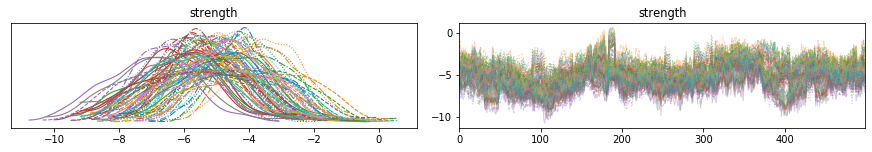

In [40]:
pm.traceplot(trace)

d:\Anaconda3.5.1\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
d:\Anaconda3.5.1\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


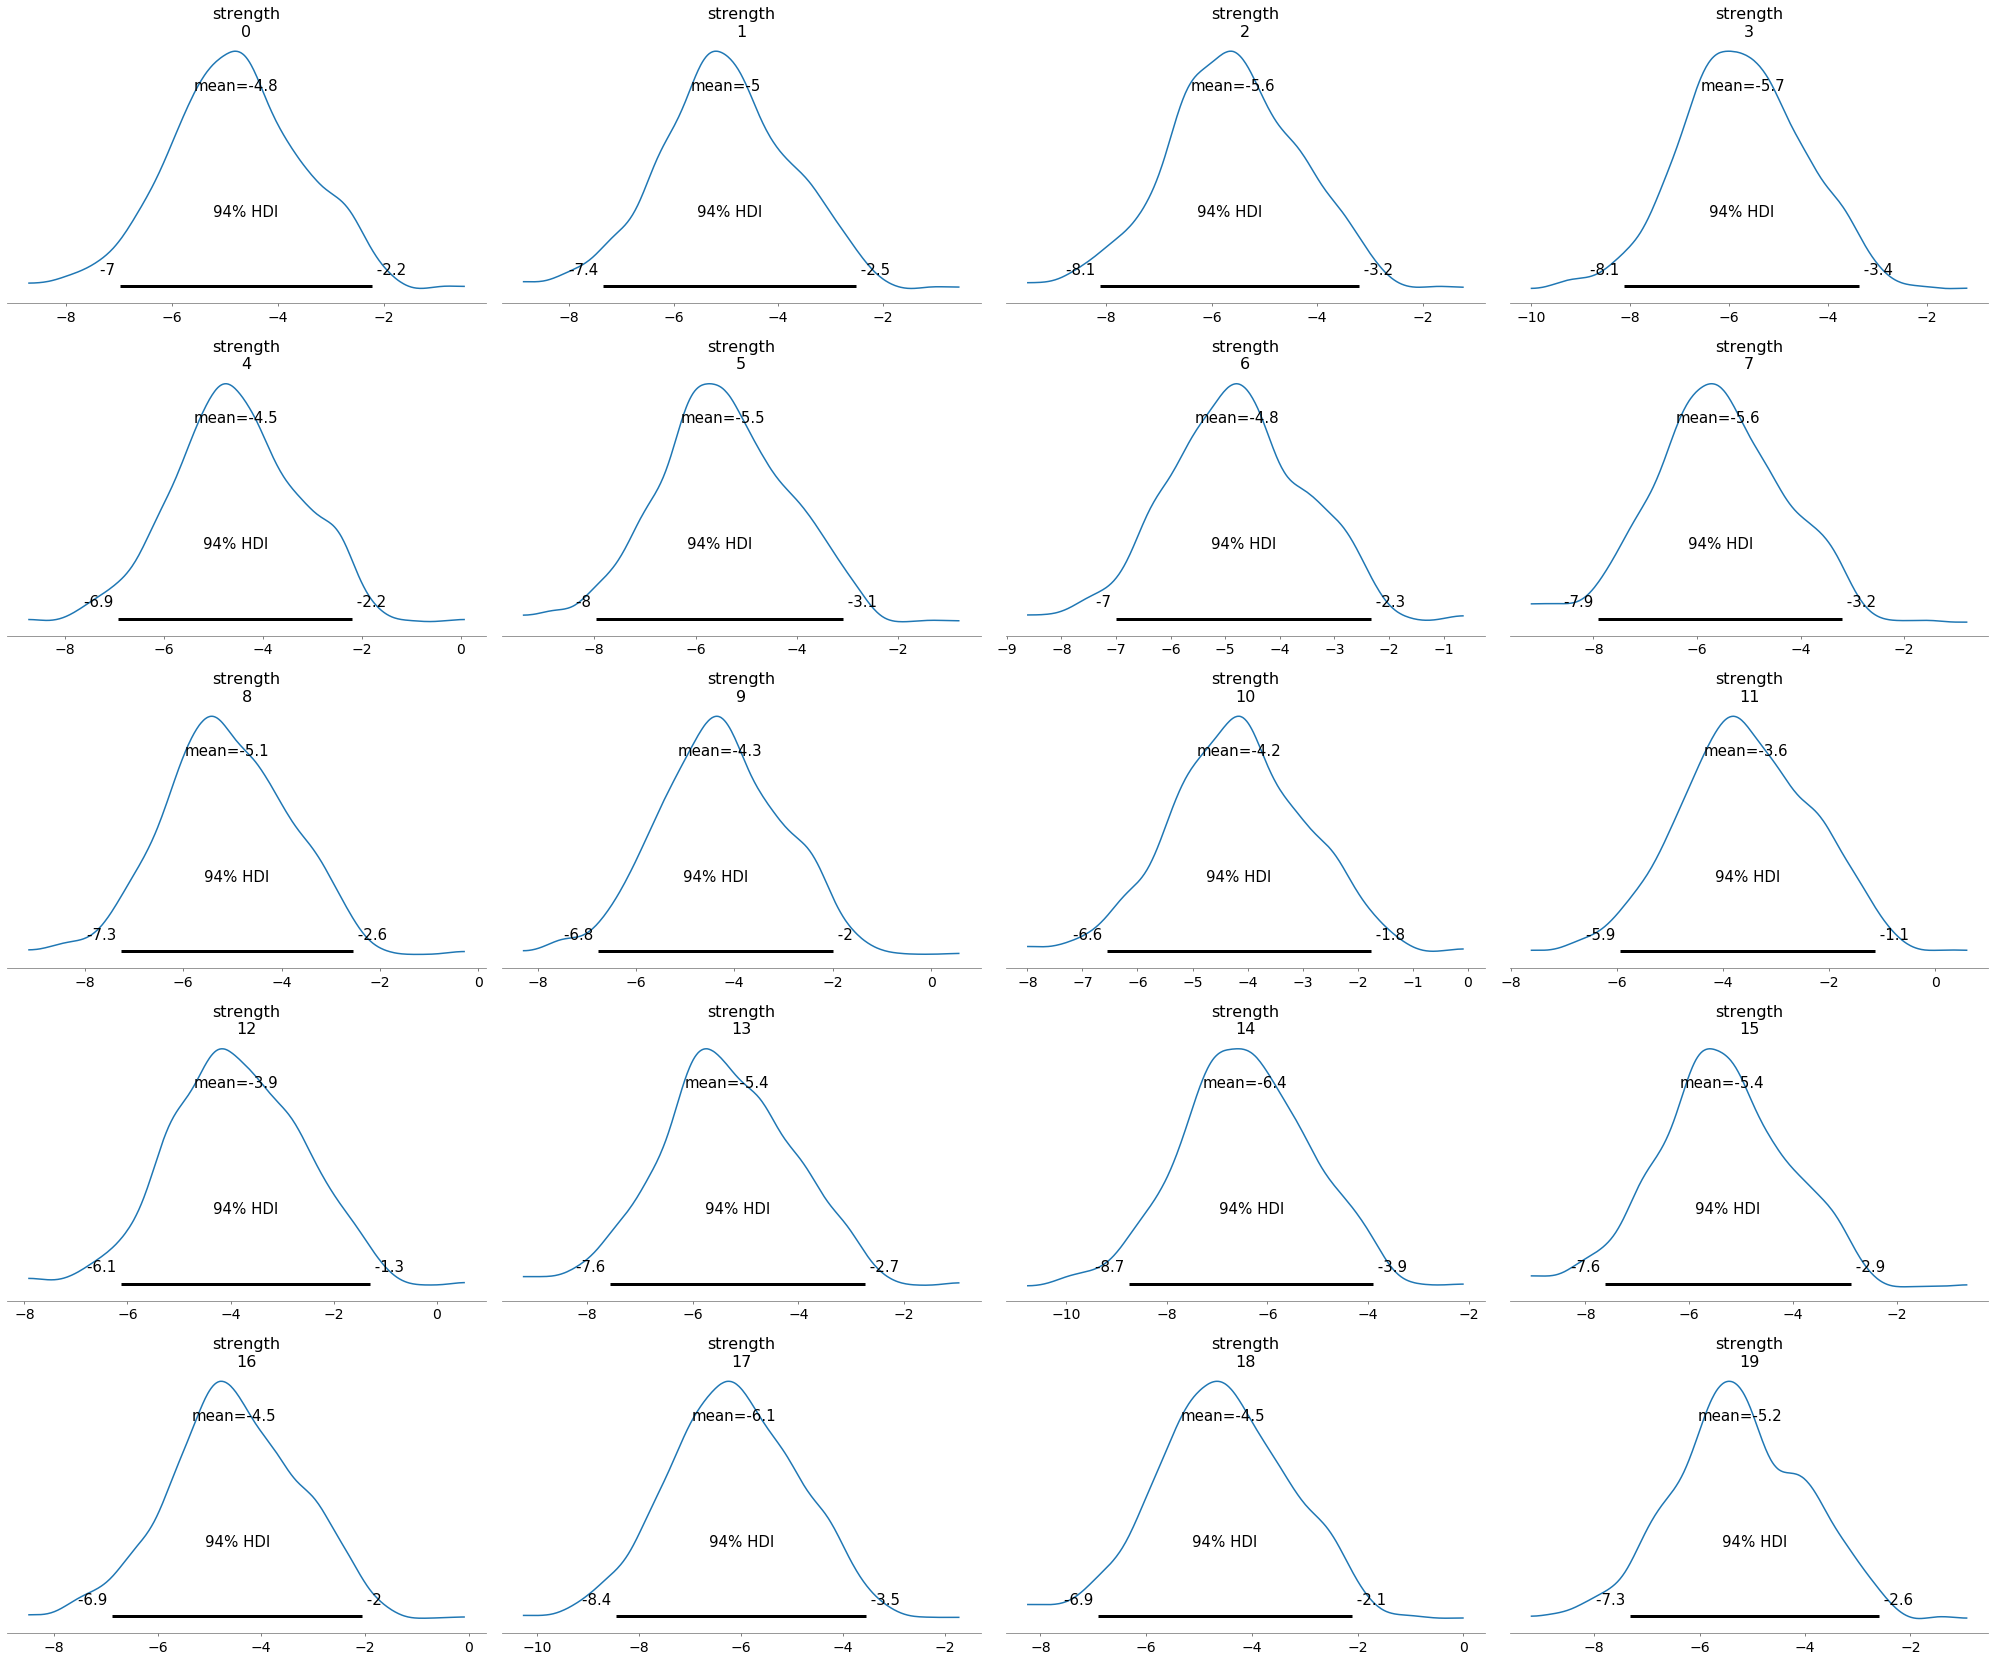

In [41]:
from pymc3 import plot_posterior

plot_posterior(trace[100:], 
                varnames=["strength"]);

In [46]:
strength0 = trace['strength'][0]
strength1 = trace['strength'][1]
strength2 = trace['strength'][2]
strength3 = trace['strength'][3]
strength4 = trace['strength'][4]

In [55]:
np.mean(trace['strength'][11])

-4.526340170414227

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 0, 'strength4 value')

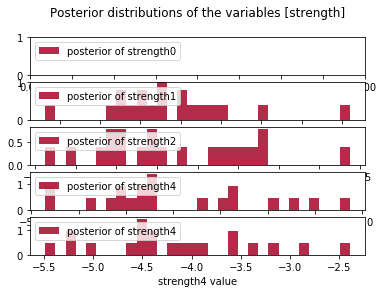

In [47]:
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

%matplotlib inline
import matplotlib.pylab as plt

#histogram of the samples:

ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.title(r"""Posterior distributions of the variables [strength]
    """)
plt.xlim([-4, 4])
plt.xlim([0, 2])

plt.hist(strength0, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of strength0", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("strength0 value")

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(strength1, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of strength1", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("strength1 value")

plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(strength2, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of strength2", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("strength2 value")

plt.subplot(514)
ax.set_autoscaley_on(False)
plt.hist(strength3, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of strength4", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("strength3 value")

plt.subplot(515)
ax.set_autoscaley_on(False)
plt.hist(strength4, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of strength4", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.xlabel("strength4 value")

In [15]:
az.load_arviz_data('non_centered_eight')

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002EE6B2154E0>],
      dtype=object)

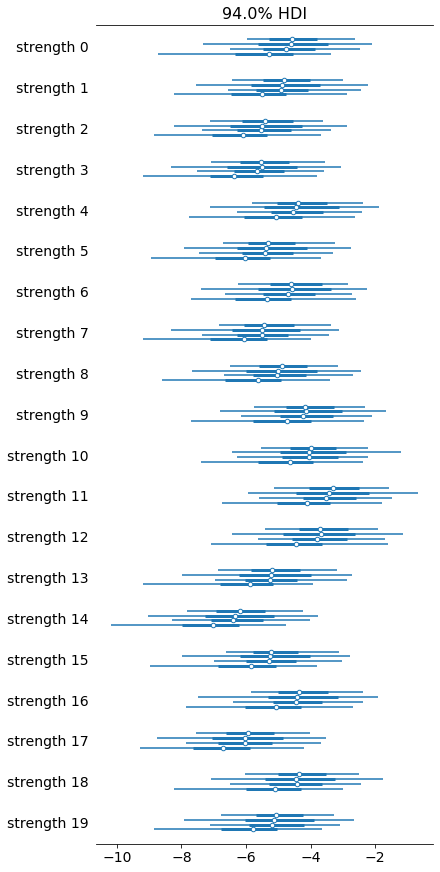

In [42]:
import arviz as az
az.plot_forest(trace[100:], kind='forestplot')

In [45]:
teams[11], teams[12]

('Man City', 'Man United')

In [44]:
teams[14]

'Sheffield United'

In [51]:
l = [1,2,3]
np.mean(l)

2.0

In [58]:
means = []
for i in range(20):
    means.append(np.mean(trace['strength'][i]))
means

[-5.498134240705882,
 -5.6318657120608115,
 -5.773004366523802,
 -3.9555156549464114,
 -4.146870364094906,
 -4.130108849655621,
 -3.9970737038488564,
 -4.469270207872786,
 -4.734884167157867,
 -4.314558641333383,
 -4.419504567126795,
 -4.526340170414227,
 -4.604236855618338,
 -4.574242239238345,
 -4.421157584199132,
 -4.4403613266969675,
 -4.464361190925812,
 -4.5412401393176545,
 -4.06511332048925,
 -4.19141042605467]

In [48]:
az.summary(trace).round(2)

d:\Anaconda3.5.1\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
strength[0],-4.88,1.31,-7.32,-2.46,0.18,0.13,55.0,54.0,55.0,120.0,1.08
strength[1],-5.11,1.30,-7.52,-2.63,0.18,0.13,55.0,53.0,55.0,128.0,1.08
strength[2],-5.69,1.30,-8.26,-3.36,0.18,0.13,55.0,53.0,55.0,113.0,1.08
strength[3],-5.82,1.29,-8.12,-3.36,0.18,0.13,54.0,53.0,54.0,130.0,1.08
strength[4],-4.64,1.30,-6.96,-2.19,0.18,0.13,55.0,53.0,55.0,122.0,1.08
strength[5],-5.56,1.31,-8.05,-3.19,0.18,0.13,54.0,52.0,53.0,115.0,1.08
strength[6],-4.87,1.30,-7.34,-2.57,0.18,0.13,53.0,52.0,53.0,112.0,1.08
strength[7],-5.69,1.30,-7.96,-3.20,0.18,0.12,55.0,54.0,55.0,107.0,1.08
strength[8],-5.22,1.30,-7.75,-2.97,0.18,0.13,55.0,53.0,54.0,116.0,1.08
strength[9],-4.38,1.30,-6.75,-2.03,0.18,0.13,55.0,53.0,55.0,107.0,1.08


In [61]:
list(zip(teams, az.summary(trace).round(2)['mean']))

d:\Anaconda3.5.1\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


[('Arsenal', -4.88),
 ('Aston Villa', -5.11),
 ('Brighton', -5.69),
 ('Burnley', -5.82),
 ('Chelsea', -4.64),
 ('Crystal Palace', -5.56),
 ('Everton', -4.87),
 ('Fulham', -5.69),
 ('Leeds', -5.22),
 ('Leicester', -4.38),
 ('Liverpool', -4.25),
 ('Man City', -3.66),
 ('Man United', -3.98),
 ('Newcastle', -5.45),
 ('Sheffield United', -6.54),
 ('Southampton', -5.45),
 ('Tottenham', -4.62),
 ('West Brom', -6.23),
 ('West Ham', -4.64),
 ('Wolves', -5.33)]

d:\Anaconda3.5.1\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
d:\Anaconda3.5.1\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


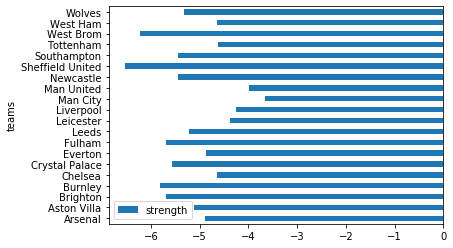

In [62]:
df = pd.DataFrame({'teams': teams, 'strength': az.summary(trace).round(2)['mean']})
ax = df.plot.barh(x='teams', y='strength')

From here, we can also see that the MCMC seems to have converged well since the [Gelman-Rubin diagnostic](https://www.stata.com/features/overview/gelman-rubin-convergence-diagnostic/), r_hat, 
doesn’t indicate any problem (values are all close or equal to 1).

You can also see that some teams have a negative strength, but this is totally fine since we only use the difference in strength between 2 teams anyway. If you do not like this for some reason, you can either replace the strength priors with a HalfNormal distribution or you just add some constant like 5 to the posteriors, so all means and HDIs are in the positive range.

The model started off with some prior beliefs about the strength levels of teams, which then got updated via data. The more games a team plays, the smaller the uncertainty about this team’s strength. In one extreme case, if a team never played a single game, the posterior distribution of their strength equals the prior distribution.